IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

FABRICI-LOURENCO Tifenn  
DELAYE-MAILLOT Kyllian

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [2]:
import string

# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from iads.utils import dist_cosinus
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [5]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
print(len(newsgroups_df))
newsgroups_df

18846


,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [4]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


# Mini-Projet

## Remarques
- Il faut installer la librairie jax (pip install jax) pour la PCA afin de paralléliser les calculs
- Taille des échantillons : 500 exemples (nécessaire pour éviter des temps de calculs et une consommation mémoire trop importante)
- IA (Claude & ChatGPT/Copilot) pour approfondir le cours, fouiller des docs plus rapidement, et aider le debuggage de python
- https://github.com/Ionys320/stats

Dans un premier temps, nous allons faire une PCA pour réduire la dimension des données afin d'avoir un nuage de points.
Ce nuage nous donnera une première idée des données et nous permettra de savoir si les sujets de discussions sont plus ou moins.
Un apprentissage non-supervisé avec l'algorithme K-moyennes suivis d'un CHA sur ses centroids nous permettra de discerner
des clusters un peu plus fin.

Par la suite, nous sommes revenus avec la dimension d'origine afin d'obtenir une meilleure accuracy pour l'apprentissage supervisé.  Où nous y avons testé en vain nos modèles sur le dataset avec toutes les classes.
Par conséquent, nous avons fait le choix de tester l'accuracy sur 4 et 2 classes.

Le choix d'un échantillon de 500 exemples a été motivé par des contraintes matérielles.

## Pré-traitement des données

On commence par enlever les exemples avec message manquant.
Puis on met la version nettoyée de chaque message dans une nouvelle colonne *mots*

In [63]:
data = newsgroups_df.dropna().copy()
print(len(data))
data

18466


,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


Puis on va prendre un échantillon d'environ 500 exemples car 20000 c'est beaucoup trop grand pour nos machines.

In [64]:
sampled_data = ut.sample_dataset(data.copy(), "target", 500, seed=42)
sampled_data["mots"] = sampled_data["messages"].map(lambda msg : ut.text2vect(msg, stop_words_df["stopword"].values))

labels = np.sort(sampled_data['target'].unique())
index_mots = ut.makeWordIndex(sampled_data["mots"])

print(len(index_mots))
print(len(sampled_data))
sampled_data

12895
491


,messages,target,mots
14710,Archive-name: cryptography-faq/part05\nLast-mo...,11,"[archive, name, cryptography, faq, part05, las..."
14951,"\n\nWhat does ""DC"" stand for? Couldn't be an ...",13,"[dc, stand, antichiropractic, posting, chiropr..."
1258,: ============================================...,1,"[could, someone, please, tell, best, ftp'able,..."
11663,"Forwarded from Neal Ausman, Galileo Mission Di...",14,"[forwarded, neal, ausman, galileo, mission, di..."
17265,\nEnemy? Sounds like that's the viewpoint of ...,18,"[enemy, sounds, like, that's, viewpoint, stere..."
...,...,...,...
17714,"Here in Erie, PA there is a system in the inne...",12,"[erie, pa, system, inner, city, called, rado, ..."
6194,"\n\n\nFor what it's worth, I got my can in thr...",8,"[worth, got, three, days, chaparral, that's, u..."
14451,I've got a 386 motherboard for sale:\n\n i3...,6,"[got, 386, motherboard, sale, i386, 25dx, proc..."
15698,Excerpts from netnews.rec.autos: 24-Apr-93 Hon...,7,"[excerpts, netnews, rec, autos, 24, apr, 93, h..."


Nous stockons les labels (target) dans une variable dédiée.

In [65]:
vec_data = ut.df2array(sampled_data, "mots", index_mots)
vec_data.shape

(491, 12895)

On observe que la dimension des exemples est très très grande.
Il est nécessaire d'utiliser la PCA pour réduire la dimension.

### Application de la PCA
Pour des raisons de performance, nous avons utilisé la librairie JAX pour paralléliser les calculs.  
Cela suite aux recommendations du LLM Claude lorsque l'on cherchait un moyen d'accélérer la PCA

Dans un premier temps, on peut regarder quelles valeurs propres se démarquent

Variance capturée par les 2 premières composantes: 48.7%
Variance capturée par les 20 premières composantes: 80.0%


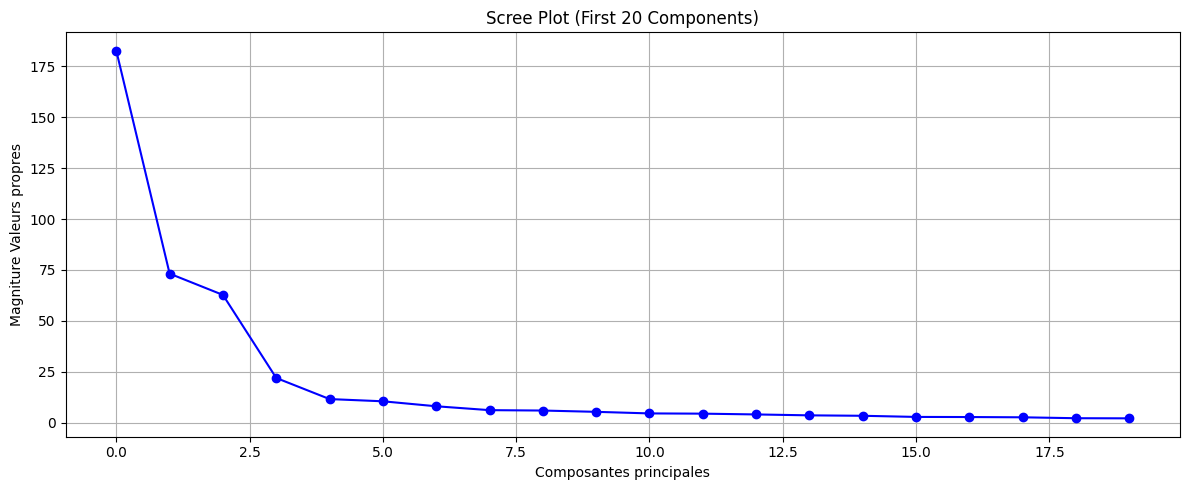

In [66]:


lam, V, data_centered = ut.calcul_eigens(vec_data) #1min30 avec 500

idx = np.flip(np.argsort(np.abs(np.real(lam))))
eigenvalues = np.abs(lam[idx])

total_variance = np.sum(eigenvalues)
variance_ratio = eigenvalues / total_variance

variance_capture = np.sum(variance_ratio[:2])
print(f"Variance capturée par les 2 premières composantes: {variance_capture:.1%}")
variance_capture = np.sum(variance_ratio[:20])
print(f"Variance capturée par les 20 premières composantes: {variance_capture:.1%}")

plt.figure(figsize=(12, 5))

plt.plot(eigenvalues[:20], 'b-o')
plt.title('Scree Plot (First 20 Components)')
plt.xlabel("Composantes principales")
plt.ylabel('Magniture Valeurs propres')
plt.grid(True)

plt.tight_layout()
plt.show()

Pour un soucis de représentation des données, on va garder uniquement 2 composantes

In [67]:
nb_components = 2

proj_data = np.array(ut.projectionND(data_centered, lam, V, nb_components))
print(proj_data.shape)
proj_data

(491, 2)


array([[ 1.74132764e-01, -1.27613735e+00],
       [ 7.13114254e-03, -8.71497616e-02],
       [ 1.02683298e-01, -1.01172961e-01],
       [-3.27680677e-01, -3.36045861e-01],
       [ 1.40884206e-01,  1.27185807e-01],
       [ 4.71063033e-02,  1.24080181e-01],
       [ 7.90883899e-02, -1.15653455e-01],
       [-1.31868161e-02,  7.23319799e-02],
       [ 2.06923693e-01,  8.18797946e-02],
       [ 1.41041219e-01, -1.35514624e-02],
       [ 4.20352519e-01,  1.17438257e-01],
       [ 8.65741223e-02,  8.47612470e-02],
       [ 4.88684997e-02,  5.07850796e-02],
       [-8.97514597e-02, -7.06003681e-02],
       [-5.08154519e-02, -4.72575836e-02],
       [ 2.85802279e-02, -1.46005183e-01],
       [-8.28937814e-02,  1.86120383e-02],
       [ 6.74735755e-03,  5.99263608e-02],
       [-4.99439985e-03, -2.91922968e-02],
       [-1.39241777e-02,  3.81614119e-02],
       [ 1.33148395e-02,  1.78726800e-02],
       [-2.11910605e-02,  1.80194676e-01],
       [-2.32756697e-02,  4.58983667e-02],
       [ 2.

On dispose maintenant d'un échantillon propre pour travailler dessus

491


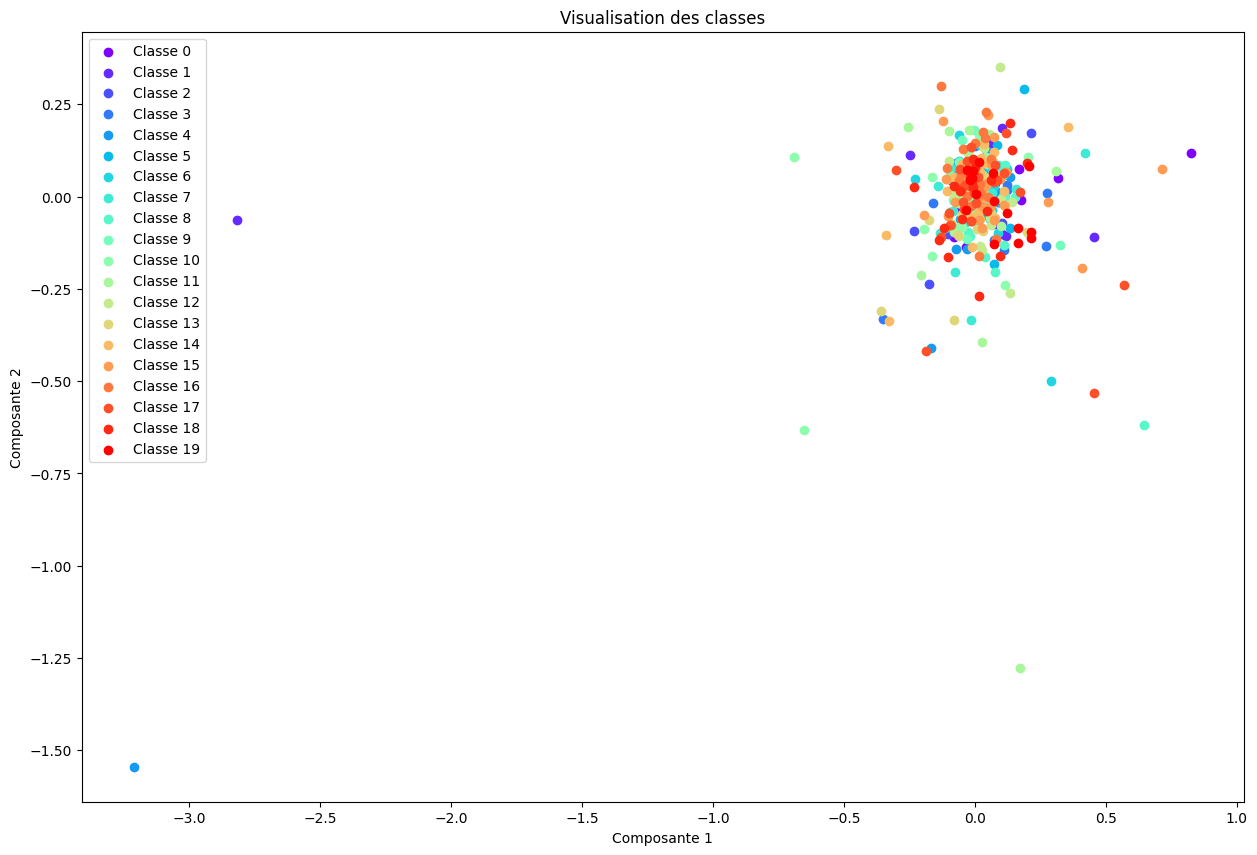

In [68]:
proj_data=np.array(proj_data)
Y = sampled_data["target"]
print(len(Y))

unique_classes = np.unique(Y)
num_classes = len(unique_classes)
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes)) # palette de couleurs

plt.figure(figsize=(15, 10))
for i, y in enumerate(unique_classes):
    # masque pour récupère tous les exemples de la classe y
    mask = Y == y

    plt.scatter(proj_data[mask, 0], proj_data[mask, 1], 
                color=colors[i], 
                label=f'Classe {y}')

plt.legend()
plt.title('Visualisation des classes')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

On voit donc qu'il y a un énorme cluster principale et des petits points qui gravitent autour.

## Analyse par classification supervisée

### Application du K-moyennes
Dans un premier temps, on va essayer de trouver le bon nombre de clusters qui minimise J

In [69]:
X = pd.DataFrame(proj_data)
eps=10e-3
it_max = 200
K_opti=90

# J_lst = []
# K_lst = []
# for k in range(2, 100):
#     J=[]
#     for j in range(10):
#         centres, P = clust.kmoyennes(k, X, eps, it_max)
#         J.append(clust.inertie_globale(X,P))
#
#     J_lst.append(np.mean(J))
#     K_lst.append(k)
#     print(k)
#
# idx = np.argmin(J_lst)
# K_opti = K_lst[idx]
#
# print(K_opti) # K=90

Iteration 1 Inertie: 1.7995052337646484 Difference: 0.4410521984100342
Iteration 2 Inertie: 1.7272980213165283 Difference: 0.07220721244812012
Iteration 3 Inertie: 1.7028858661651611 Difference: 0.024412155151367188
Iteration 4 Inertie: 1.6983568668365479 Difference: 0.004528999328613281


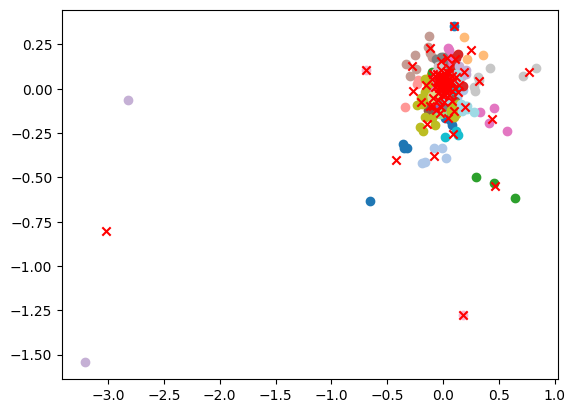

In [70]:
# affichage

C, P = clust.kmoyennes(K_opti,X, eps, it_max)

ut.affiche_resultat_kmeans(X, C, P)


L'idée maintenant est de faire un CHA sur les centroids de chaque cluster avec K la racine du nombre d'exemples

In [ ]:
C = []
P = []
J = 100000
ex_sqrt=int(np.sqrt(len(sampled_data)))

# on cherche une partition de l'ordre de J=2.5 pour avoir un truc correct
while J > 2.5:
    Ctmp, Ptmp = clust.kmoyennes(ex_sqrt, X, eps, it_max)
    Jtmp = clust.inertie_globale(X, Ptmp)

    J = Jtmp
    C = Ctmp
    P = Ptmp

Iteration 1 Inertie: 4.532084941864014 Difference: 3.9536080360412598
Iteration 2 Inertie: 4.1693115234375 Difference: 0.36277341842651367
Iteration 3 Inertie: 3.844966173171997 Difference: 0.32434535026550293
Iteration 4 Inertie: 3.6649293899536133 Difference: 0.1800367832183838
Iteration 5 Inertie: 3.3712871074676514 Difference: 0.2936422824859619
Iteration 6 Inertie: 3.3030576705932617 Difference: 0.06822943687438965
Iteration 7 Inertie: 3.2420217990875244 Difference: 0.061035871505737305
Iteration 8 Inertie: 3.2103185653686523 Difference: 0.03170323371887207
Iteration 9 Inertie: 3.1914052963256836 Difference: 0.01891326904296875
Iteration 10 Inertie: 3.1702988147735596 Difference: 0.021106481552124023
Iteration 11 Inertie: 3.1314127445220947 Difference: 0.038886070251464844
Iteration 12 Inertie: 3.0779216289520264 Difference: 0.05349111557006836
Iteration 13 Inertie: 3.0592451095581055 Difference: 0.0186765193939209
Iteration 14 Inertie: 3.045712471008301 Difference: 0.013532638549

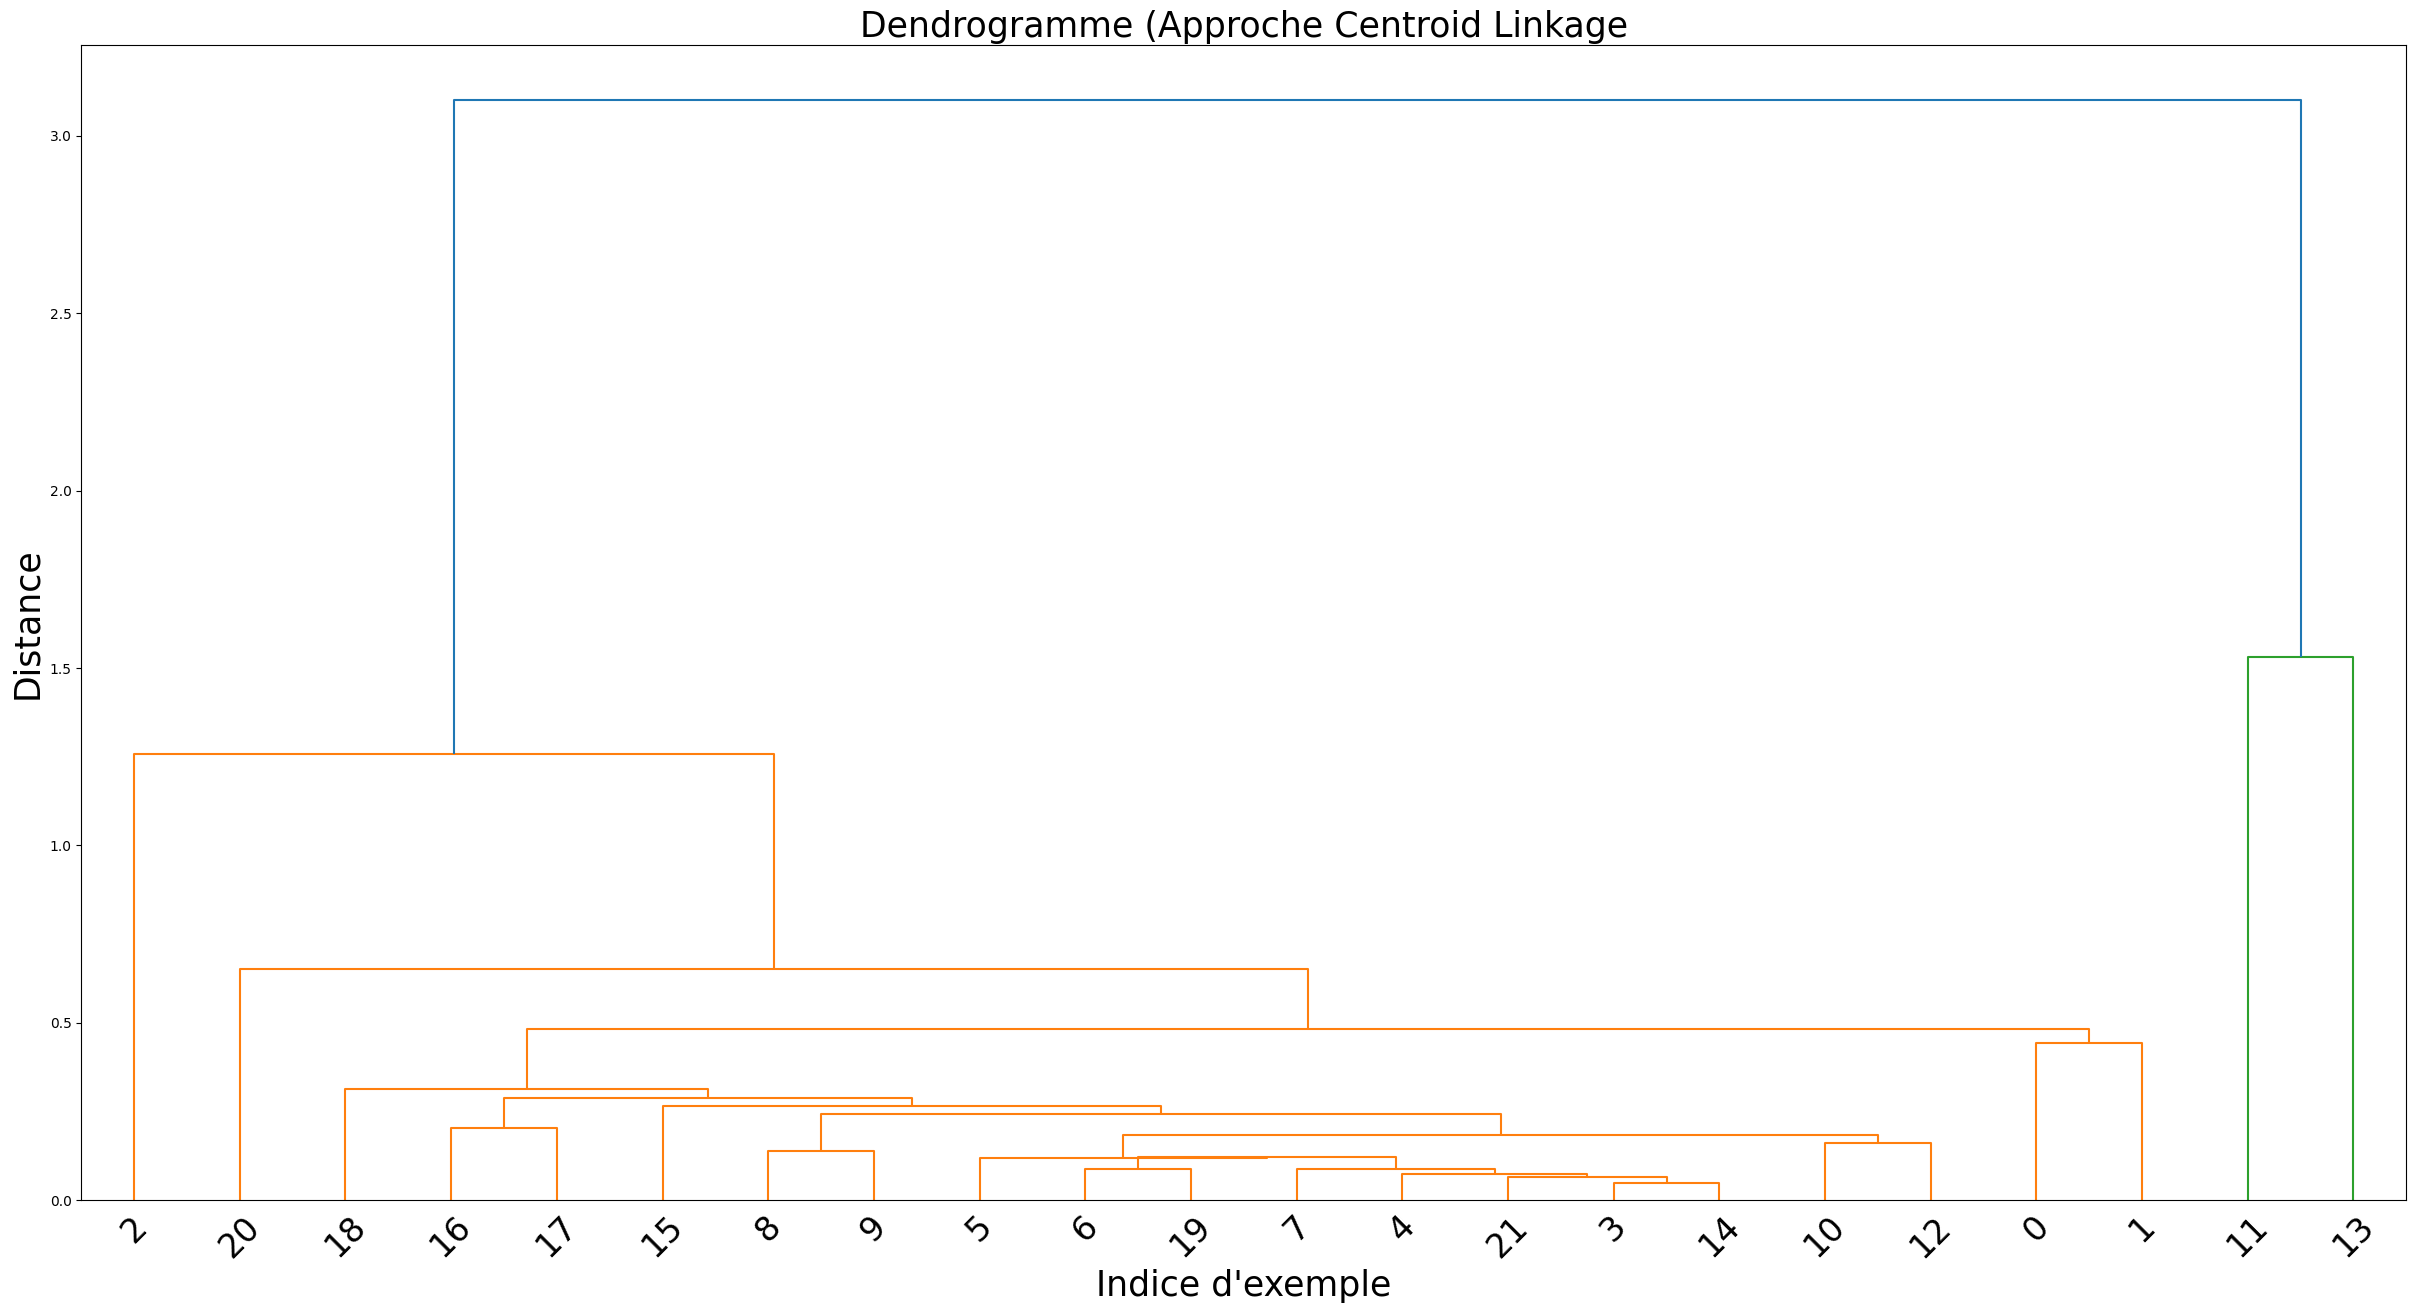

[[3, 14, 0.048807889223098755, 2],
 [21, 22, 0.06433512270450592, 3],
 [4, 23, 0.07463988661766052, 4],
 [6, 19, 0.08701648563146591, 2],
 [7, 24, 0.08878675848245621, 5],
 [25, 26, 0.12120503932237625, 7],
 [5, 27, 0.11916407197713852, 8],
 [8, 9, 0.1392686814069748, 2],
 [10, 12, 0.16166450083255768, 2],
 [28, 30, 0.18465740978717804, 10],
 [16, 17, 0.2037075310945511, 2],
 [29, 31, 0.24297165870666504, 12],
 [15, 33, 0.26432305574417114, 13],
 [32, 34, 0.287692666053772, 15],
 [18, 35, 0.3142184615135193, 16],
 [0, 1, 0.44326111674308777, 2],
 [36, 37, 0.48362722992897034, 18],
 [20, 38, 0.6503649950027466, 19],
 [2, 39, 1.258579969406128, 20],
 [11, 13, 1.532355546951294, 2],
 [40, 41, 3.1003222465515137, 22]]

In [72]:
df = pd.DataFrame(C)
clust.CHA(df, "centroid", verbose=False, dendrogramme=True)

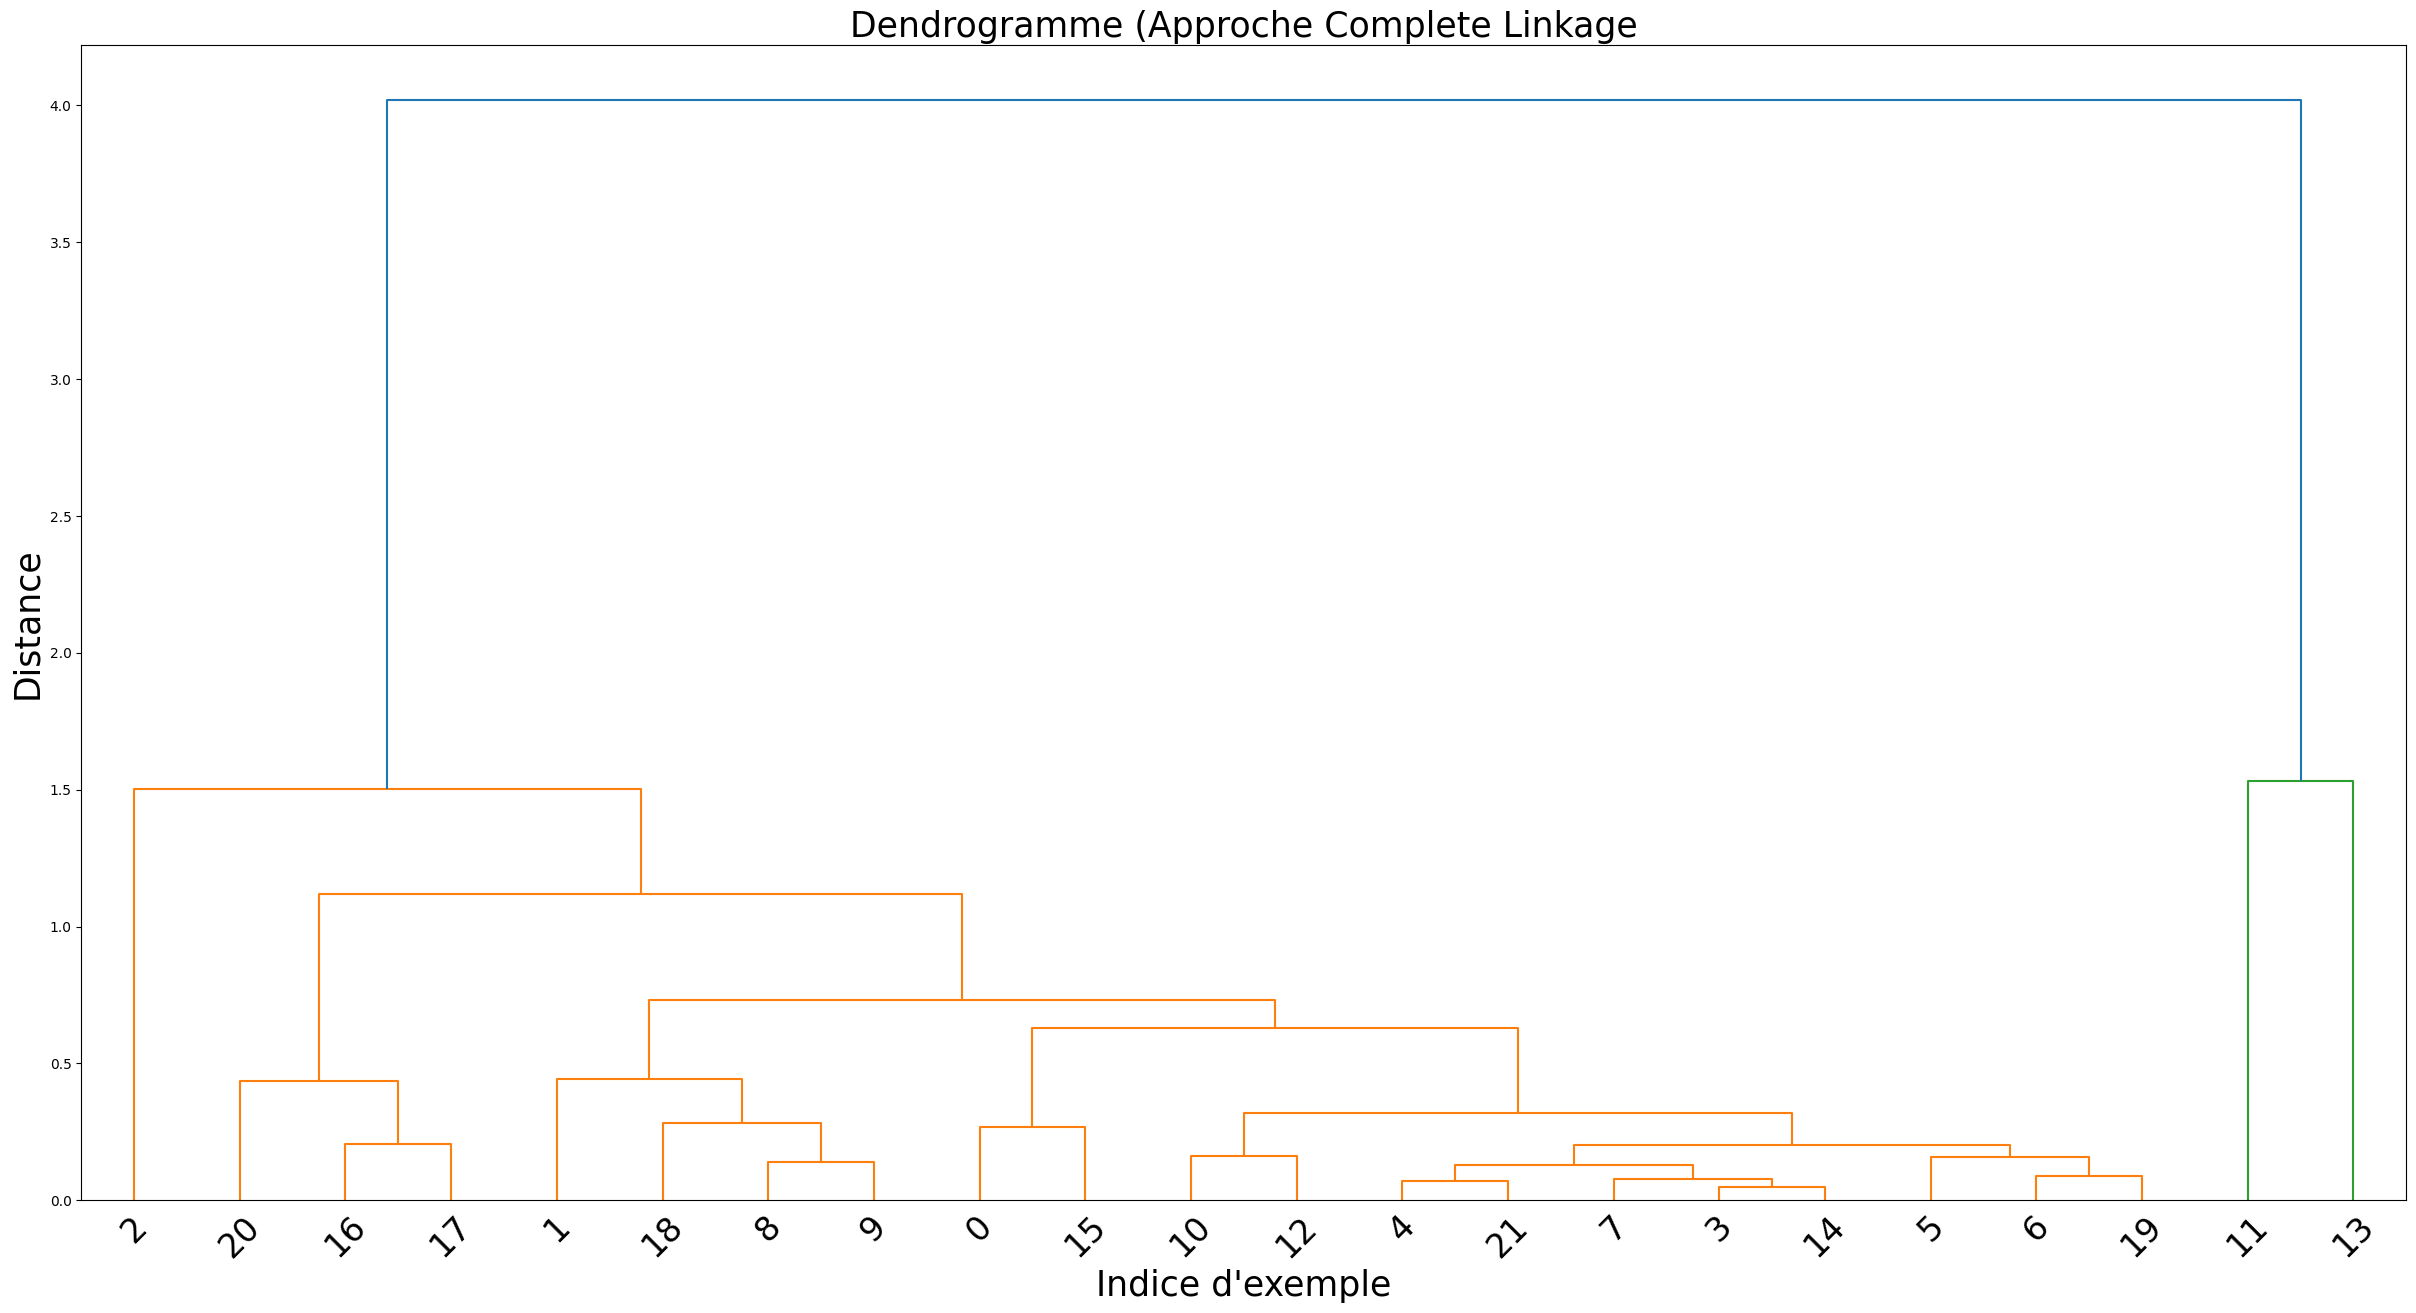

[[3, 14, 0.048807889223098755, 2],
 [4, 21, 0.07106433063745499, 2],
 [7, 22, 0.07832706719636917, 3],
 [6, 19, 0.08701648563146591, 2],
 [23, 24, 0.12761326134204865, 5],
 [8, 9, 0.1392686814069748, 2],
 [5, 25, 0.15981610119342804, 3],
 [10, 12, 0.16166450083255768, 2],
 [26, 28, 0.20088472962379456, 8],
 [16, 17, 0.2037075310945511, 2],
 [0, 15, 0.2664461135864258, 2],
 [18, 27, 0.2828831672668457, 3],
 [29, 30, 0.317280650138855, 10],
 [20, 31, 0.436357706785202, 3],
 [1, 33, 0.44165146350860596, 4],
 [32, 34, 0.6301604509353638, 12],
 [36, 37, 0.7309883236885071, 16],
 [35, 38, 1.1177014112472534, 19],
 [2, 39, 1.5022552013397217, 20],
 [11, 13, 1.532355546951294, 2],
 [40, 41, 4.0186333656311035, 22]]

In [ ]:
clust.CHA(df, "complete", verbose=False, dendrogramme=True)

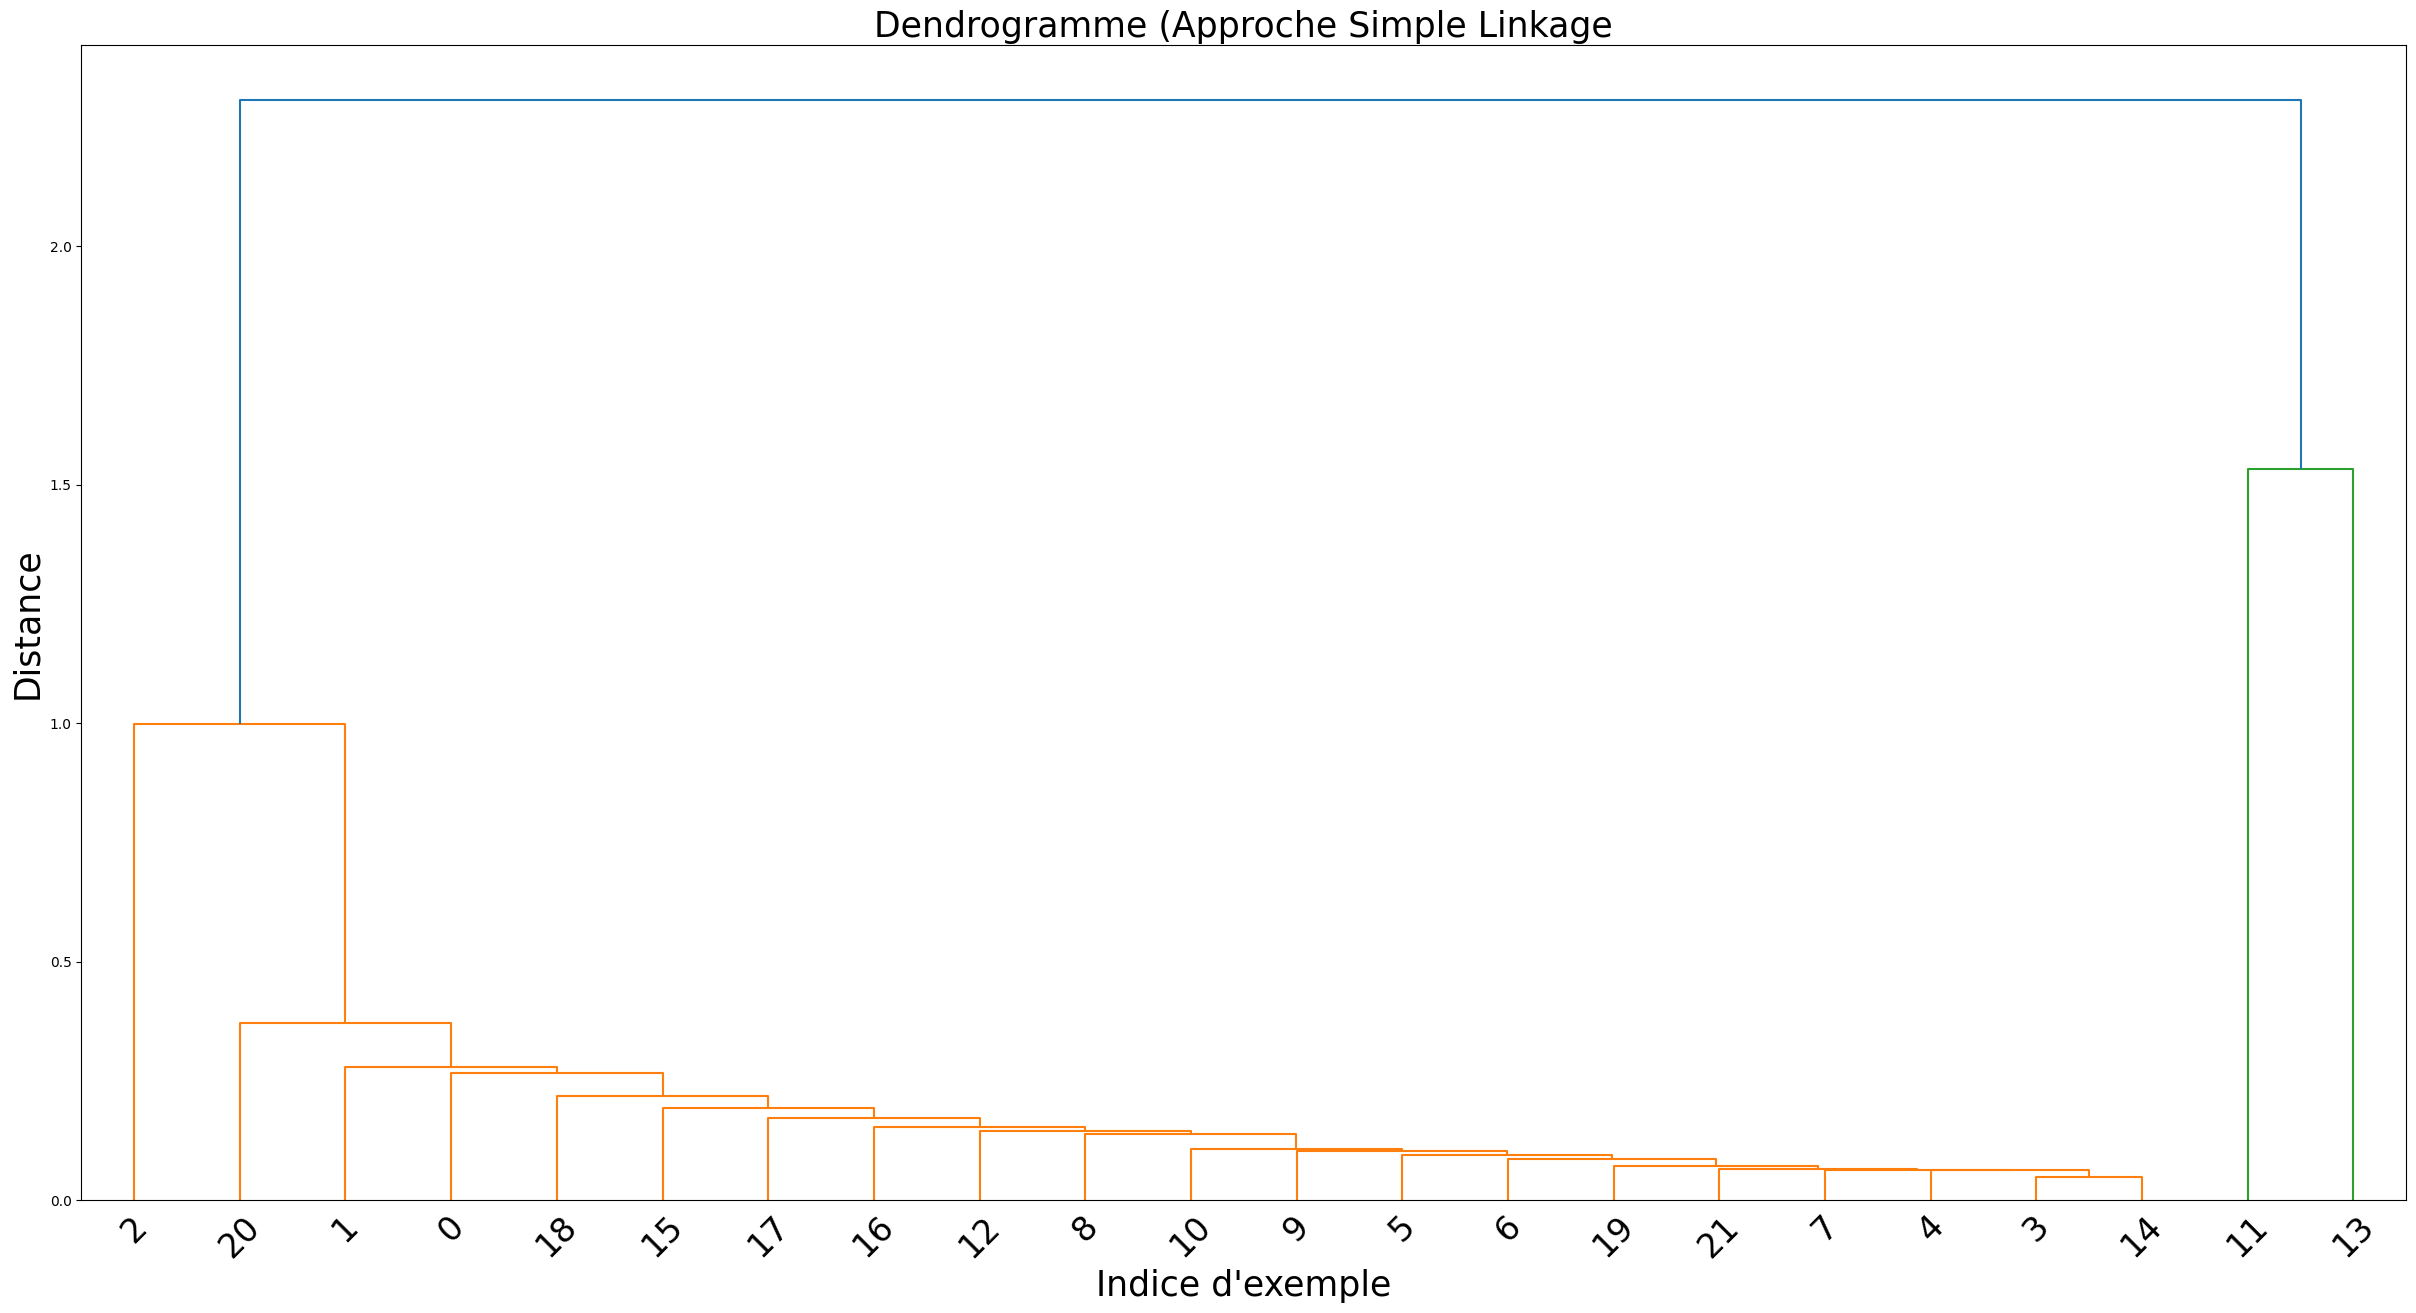

[[3, 14, 0.048807889223098755, 2],
 [4, 22, 0.0637548416852951, 3],
 [7, 23, 0.06389317661523819, 4],
 [21, 24, 0.0648295059800148, 5],
 [19, 25, 0.07173381000757217, 6],
 [6, 26, 0.08701648563146591, 7],
 [5, 27, 0.09505495429039001, 8],
 [9, 28, 0.10233999788761139, 9],
 [10, 29, 0.10847078263759613, 10],
 [8, 30, 0.1392686814069748, 11],
 [12, 31, 0.14459508657455444, 12],
 [16, 32, 0.15264514088630676, 13],
 [17, 33, 0.17327532172203064, 14],
 [15, 34, 0.19250211119651794, 15],
 [18, 35, 0.2178935557603836, 16],
 [0, 36, 0.2664461135864258, 17],
 [1, 37, 0.2790960967540741, 18],
 [20, 38, 0.3708886206150055, 19],
 [2, 39, 0.9974260926246643, 20],
 [11, 13, 1.532355546951294, 2],
 [40, 41, 2.3058602809906006, 22]]

In [ ]:
clust.CHA(df, "simple", verbose=False, dendrogramme=True)

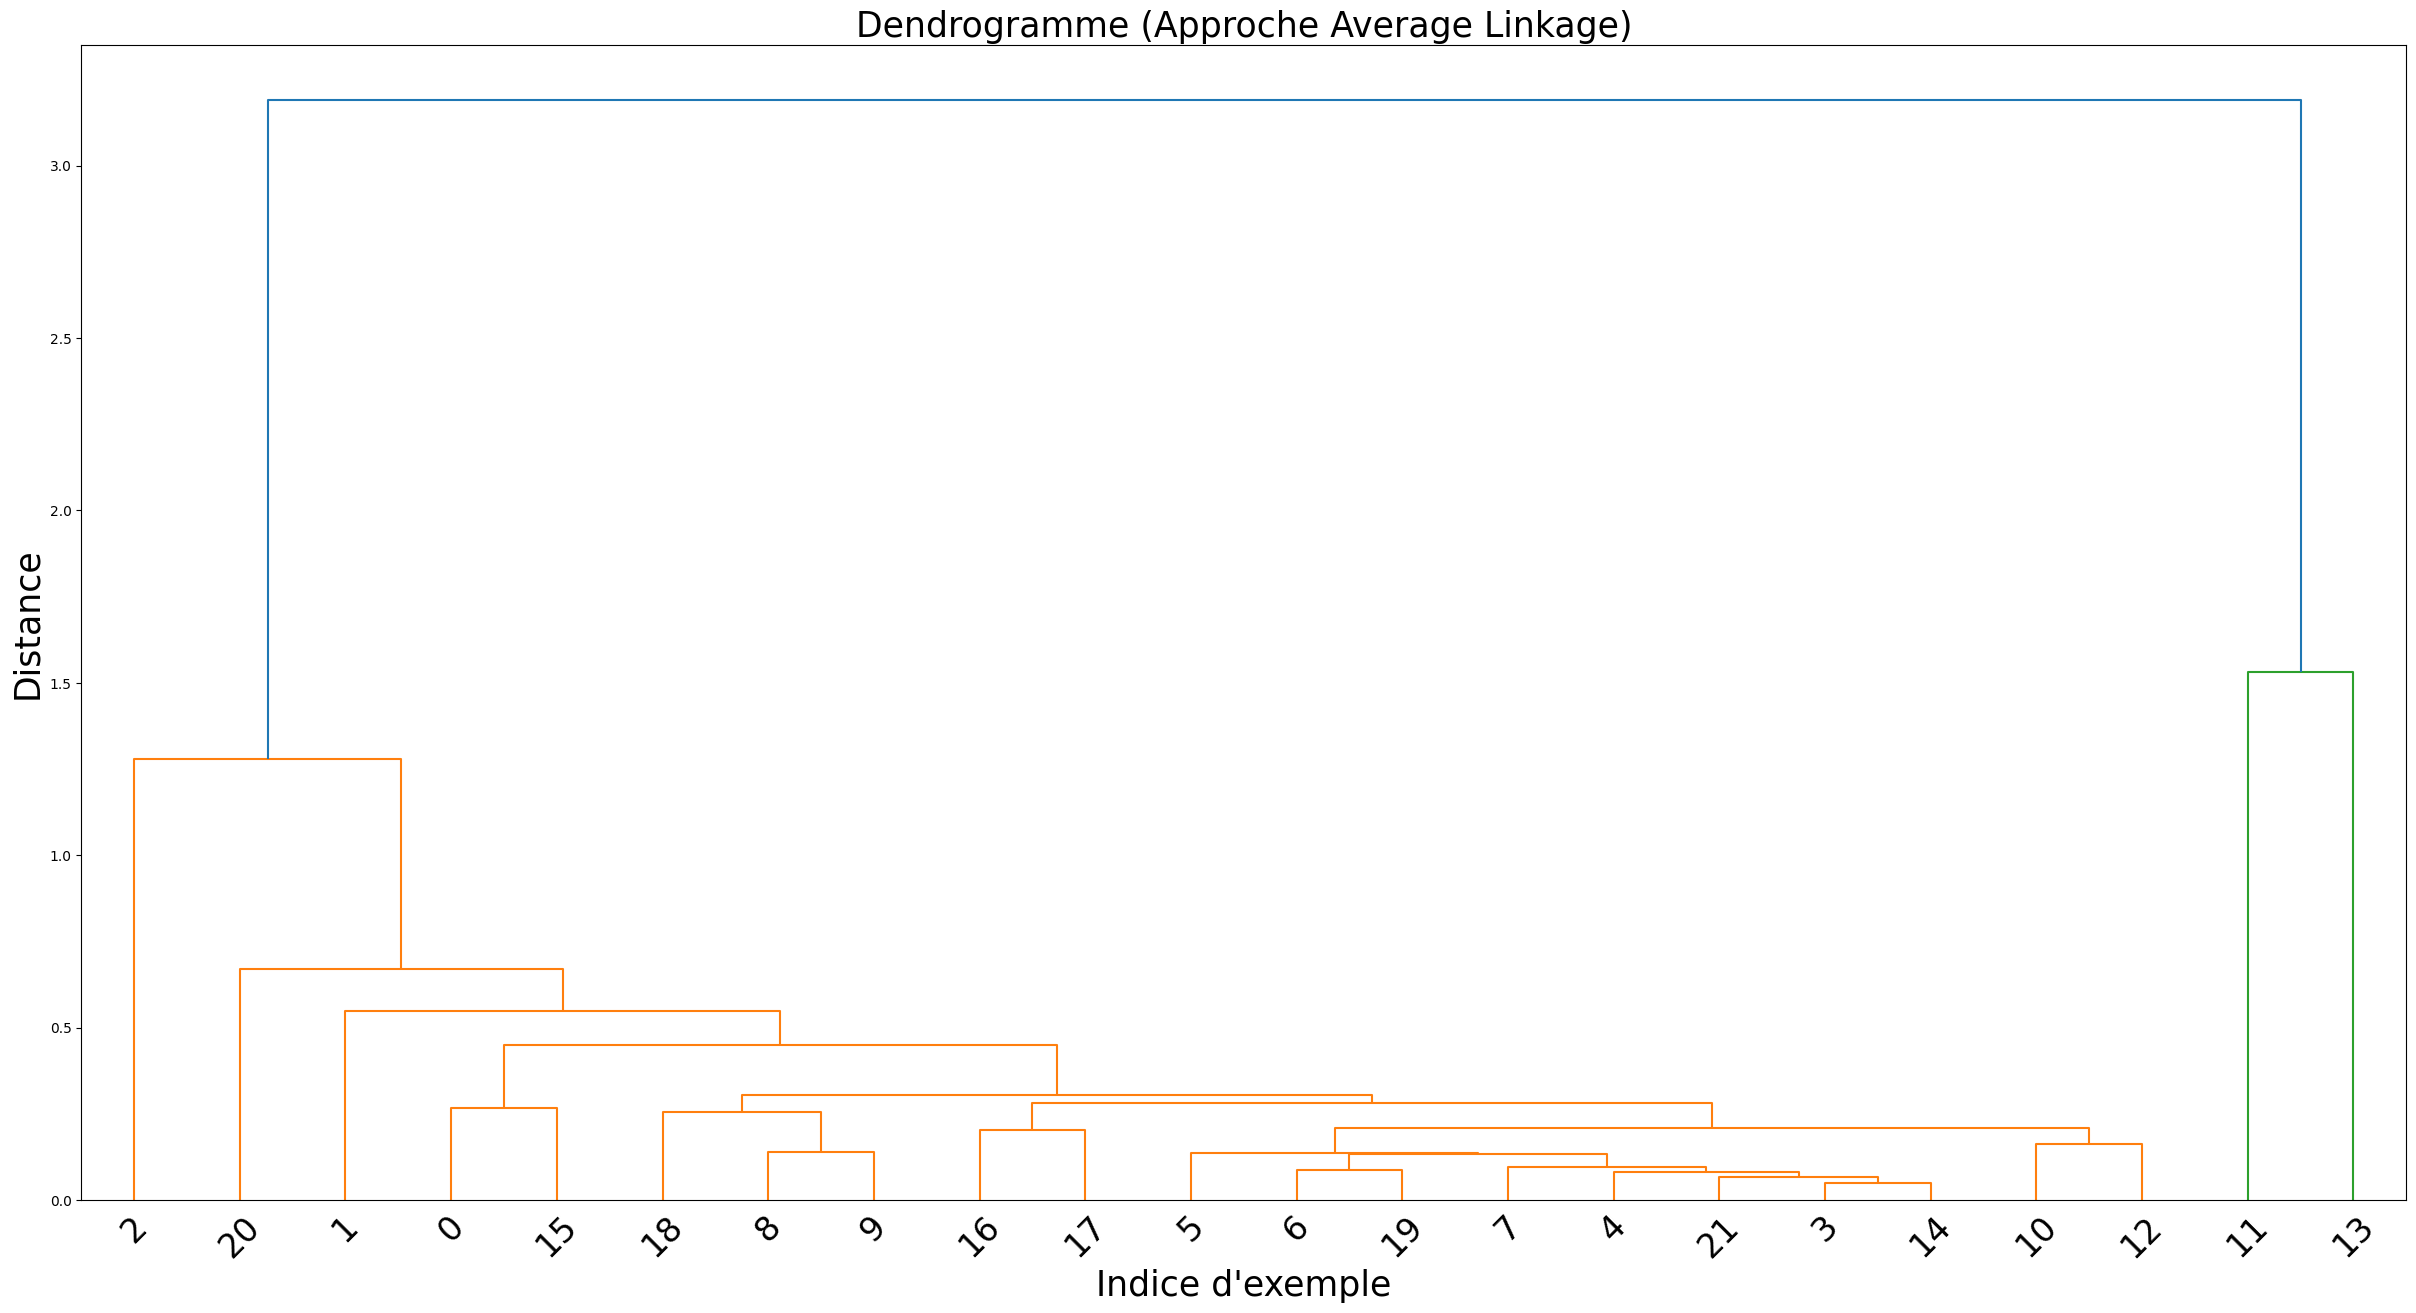

[[3, 14, 0.048807889223098755, 2],
 [21, 22, 0.06869924068450928, 3],
 [4, 23, 0.08076176047325134, 4],
 [6, 19, 0.08701648563146591, 2],
 [7, 24, 0.09613602608442307, 5],
 [25, 26, 0.1342790424823761, 7],
 [5, 27, 0.1363658607006073, 8],
 [8, 9, 0.1392686814069748, 2],
 [10, 12, 0.16166450083255768, 2],
 [16, 17, 0.2037075310945511, 2],
 [28, 30, 0.20976266264915466, 10],
 [18, 29, 0.2546738386154175, 3],
 [0, 15, 0.2664461135864258, 2],
 [31, 32, 0.2829825282096863, 12],
 [33, 35, 0.30558133125305176, 15],
 [34, 36, 0.4492809474468231, 17],
 [1, 37, 0.549764096736908, 18],
 [20, 38, 0.6709996461868286, 19],
 [2, 39, 1.2806291580200195, 20],
 [11, 13, 1.532355546951294, 2],
 [40, 41, 3.189441204071045, 22]]

In [ ]:
clust.CHA(df, "average", verbose=False, dendrogramme=True)

Au vu du nombre de valeurs aberrantes sur le nuage de points, l'approche simple linkage est à écarter.
La forme sphérique du nuage fait que nous allons garder l'approche centroid linkage.

On peut y distinguer pleins de petits cluster formant un premier groupe principale ainsi qu'un second petit cluster distinct en vert.
Les données se concentrent en un gros cluster et des petits éparpillés comme vu précédemment sur le nuage de points.

## Analyse par classification supervisée avec PCA


In [76]:
data = pd.DataFrame(proj_data)
data["target"] = np.array(Y)
data

,0,1,target
0,0.174133,-1.276137,11
1,0.007131,-0.087150,13
2,0.102683,-0.101173,1
3,-0.327681,-0.336046,14
4,0.140884,0.127186,18
...,...,...,...
486,0.016333,0.066624,12
487,0.075496,-0.203714,8
488,0.066845,-0.037407,6
489,-0.007346,-0.049789,7


In [77]:
df_train, df_test = ut.generate_train_test_MULTI(data, Y, seed=42)
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 0 pris pour apprendre: 16
Nombre d'exemples du label 1 pris pour apprendre: 20
Nombre d'exemples du label 2 pris pour apprendre: 20
Nombre d'exemples du label 3 pris pour apprendre: 20
Nombre d'exemples du label 4 pris pour apprendre: 20
Nombre d'exemples du label 5 pris pour apprendre: 20
Nombre d'exemples du label 6 pris pour apprendre: 20
Nombre d'exemples du label 7 pris pour apprendre: 20
Nombre d'exemples du label 8 pris pour apprendre: 20
Nombre d'exemples du label 9 pris pour apprendre: 20
Nombre d'exemples du label 10 pris pour apprendre: 20
Nombre d'exemples du label 11 pris pour apprendre: 20
Nombre d'exemples du label 12 pris pour apprendre: 20
Nombre d'exemples du label 13 pris pour apprendre: 20
Nombre d'exemples du label 14 pris pour apprendre: 20
Nombre d'exemples du label 15 pris pour apprendre: 20
Nombre d'exemples du label 16 pris pour apprendre: 19
Nombre d'exemples du label 17 pris pour apprendre: 20
Nombre d'exemples du label 18 pris pou

In [ ]:
mat_train = np.array(df_train.drop(columns=["target"]))
Y_train = np.array(df_train[["target"]])

mat_test = np.array(df_test.drop(columns=["target"]))
Y_test = np.array(df_test[["target"]])

### KNN
On va appliquer le KNN avec K dans {1, 3, 5, 7} et la distance euclidienne

In [79]:
K_vals = [1,3,5,7]

knn_lst = []
accu_train = []
accu_test = []
for K in K_vals:
    knn = classif.ClassifierKNN(nb_components, K)
    knn.train(mat_train, Y_train)

    atrain = knn.accuracy(mat_train, Y_train)
    atest = knn.accuracy(mat_test, Y_test)
    accu_train.append(atrain)
    accu_test.append(atest)
    knn_lst.append((knn, atrain, atest))

for K, atrain, atest in zip(K_vals, accu_train, accu_test):
    print(f"Accuracy pour {K}NN:")
    print(f"\tEnsemble d'apprentissage:\t{atrain}")
    print(f"\tEnsemble de test:\t{atest}")

Accuracy pour 1NN:
	Ensemble d'apprentissage:	0.9947780678851175
	Ensemble de test:	0.06481481481481477
Accuracy pour 3NN:
	Ensemble d'apprentissage:	0.3446475195822454
	Ensemble de test:	0.05555555555555558
Accuracy pour 5NN:
	Ensemble d'apprentissage:	0.26370757180156656
	Ensemble de test:	0.04629629629629628
Accuracy pour 7NN:
	Ensemble d'apprentissage:	0.25065274151436034
	Ensemble de test:	0.04629629629629628


In [80]:
knn_lst = []
accu_train = []
accu_test = []
for K in K_vals:
    knn = classif.ClassifierKNN(nb_components, K, dist=ut.dist_cosinus)
    knn.train(mat_train, Y_train)

    atrain = knn.accuracy(mat_train, Y_train)
    atest = knn.accuracy(mat_test, Y_test)
    accu_train.append(atrain)
    accu_test.append(atest)
    knn_lst.append((knn, atrain, atest))

for K, atrain, atest in zip(K_vals, accu_train, accu_test):
    print(f"Accuracy pour {K}NN:")
    print(f"\tEnsemble d'apprentissage:\t{atrain}")
    print(f"\tEnsemble de test:\t{atest}")

Accuracy pour 1NN:
	Ensemble d'apprentissage:	0.9660574412532636
	Ensemble de test:	0.07407407407407407
Accuracy pour 3NN:
	Ensemble d'apprentissage:	0.381201044386423
	Ensemble de test:	0.04629629629629628
Accuracy pour 5NN:
	Ensemble d'apprentissage:	0.31853785900783294
	Ensemble de test:	0.02777777777777779
Accuracy pour 7NN:
	Ensemble d'apprentissage:	0.24804177545691908
	Ensemble de test:	0.02777777777777779


#### Arbre de décision

In [81]:
# Apprentissage avec le classifieur des arbres numériques
cl_arbre = classif.ClassifierArbreNumerique(
    input_dimension=nb_components,
    epsilon=0.01,
    LNoms=index_mots,
)

cl_arbre.train(mat_train, df_train["target"].to_numpy())
accuracy_train = cl_arbre.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_arbre.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	0.9947780678851175
Accuracy sur l'ensemble de test:	0.027777777777777776


Le PCA marche pas trop, on constate clairement un overfit sûrement par manque de données ainsi qu'une perte d'information dû à la méthode.

## Analyse supervisée sans PCA

In [101]:
sampled_data = ut.sample_dataset(data.copy(), "target", 500, seed=42)
sampled_data["mots"] = sampled_data["messages"].map(lambda msg : ut.text2vect(msg, stop_words_df["stopword"].values))
vec_data = ut.df2array(sampled_data, "mots", index_mots)

Y= sampled_data["target"].to_numpy()
labels = np.sort(sampled_data['target'].unique())
index_mots = ut.makeWordIndex(sampled_data["mots"])

print(vec_data.shape)
print(len(index_mots))
print(len(sampled_data))
sampled_data

(499, 32615)
16345
499


,messages,target,mots
6806,: Exodus 21:22-25:\n\n: 22 And if men s...,0,"[exodus, 21, 22, 25, 22, men, struggle, strike..."
11073,"[stuff deleted...]\n\nThat's like saying that,...",0,"[stuff, deleted, that's, like, saying, since, ..."
11291,\nThe first premise and the conclusion are not...,0,"[first, premise, conclusion, properly, transla..."
16551,"..continuing on my build problems, I got stuck...",5,"[continuing, build, problems, got, stuck, buil..."
14437,"HI, all\n I study about WM_DELETE_WINDOW at...",5,"[hi, study, wm, delete, window, atom, open, lo..."
...,...,...,...
309,Mark Prado\n \n \nOld pioneer song from the ...,14,"[mark, prado, old, pioneer, song, 1850's, goes..."
15178,"Is it just me, or has this part gotten beyond ...",0,"[part, gotten, beyond, useful, gregg, understa..."
1257,Archive-name: space/new_probes\nLast-modified:...,14,"[archive, name, space, new, probes, last, modi..."
16203,"Hi,\n\nI'm trying to get my program to monitor...",5,"[hi, trying, get, program, monitor, resize, po..."


In [102]:
df_train, df_test = ut.generate_train_test_MULTI(sampled_data, Y, seed=42)
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 0 pris pour apprendre: 93
Nombre d'exemples du label 5 pris pour apprendre: 117
Nombre d'exemples du label 14 pris pour apprendre: 115
Nombre d'exemples du label 19 pris pour apprendre: 72
Dimension de df_train:	(397, 3)
Dimension de df_test:	(102, 3)


In [103]:
mat_train = ut.df2array(df_train, "mots", index_mots)
mat_test = ut.df2array(df_test, "mots", index_mots)

In [104]:
K_vals = [1,3,5,7]

knn_lst = []
accu_train = []
accu_test = []
for K in K_vals:
    knn = classif.ClassifierKNN(len(index_mots), K)
    knn.train(mat_train, df_train["target"].to_numpy())

    accu_train.append(knn.accuracy(mat_train, df_train["target"].to_numpy()))
    accu_test.append(knn.accuracy(mat_test, df_test["target"].to_numpy()))
    knn_lst.append(knn)

for K, atrain, atest in zip(K_vals, accu_train, accu_test):
    print(f"Accuracy pour {K}NN:")
    print(f"\tEnsemble d'apprentissage:\t{atrain}")
    print(f"\tEnsemble de test:\t{atest}")

Accuracy pour 1NN:
	Ensemble d'apprentissage:	0.9974811083123426
	Ensemble de test:	0.38235294117647056
Accuracy pour 3NN:
	Ensemble d'apprentissage:	0.649874055415617
	Ensemble de test:	0.2941176470588235
Accuracy pour 5NN:
	Ensemble d'apprentissage:	0.5566750629722922
	Ensemble de test:	0.3431372549019608
Accuracy pour 7NN:
	Ensemble d'apprentissage:	0.48866498740554154
	Ensemble de test:	0.303921568627451


In [ ]:

knn_lst = []
accu_train = []
accu_test = []
for K in K_vals:
    knn = classif.ClassifierKNN(len(index_mots), K, dist=ut.dist_cosinus)
    knn.train(mat_train, df_train["target"].to_numpy())

    accu_train.append(knn.accuracy(mat_train, df_train["target"].to_numpy()))
    accu_test.append(knn.accuracy(mat_test, df_test["target"].to_numpy()))
    knn_lst.append(knn)

for K, atrain, atest in zip(K_vals, accu_train, accu_test):
    print(f"Accuracy pour {K}NN:")
    print(f"\tEnsemble d'apprentissage:\t{atrain}")
    print(f"\tEnsemble de test:\t{atest}")

Accuracy pour 1NN:
	Ensemble d'apprentissage:	0.9949622166246851
	Ensemble de test:	0.6568627450980392
Accuracy pour 3NN:
	Ensemble d'apprentissage:	0.8589420654911839
	Ensemble de test:	0.6372549019607843
Accuracy pour 5NN:
	Ensemble d'apprentissage:	0.818639798488665
	Ensemble de test:	0.6372549019607843
Accuracy pour 7NN:
	Ensemble d'apprentissage:	0.783375314861461
	Ensemble de test:	0.6666666666666667


In [106]:

knn_lst = []
accu_train = []
accu_test = []
for K in K_vals:
    knn = classif.ClassifierKNN(len(index_mots), K, dist=ut.dist_hamming)
    knn.train(mat_train, df_train["target"].to_numpy())

    accu_train.append(knn.accuracy(mat_train, df_train["target"].to_numpy()))
    accu_test.append(knn.accuracy(mat_test, df_test["target"].to_numpy()))
    knn_lst.append(knn)

for K, atrain, atest in zip(K_vals, accu_train, accu_test):
    print(f"Accuracy pour {K}NN:")
    print(f"\tEnsemble d'apprentissage:\t{atrain}")
    print(f"\tEnsemble de test:\t{atest}")


Accuracy pour 1NN:
	Ensemble d'apprentissage:	0.9974811083123426
	Ensemble de test:	0.303921568627451
Accuracy pour 3NN:
	Ensemble d'apprentissage:	0.5717884130982368
	Ensemble de test:	0.27450980392156865
Accuracy pour 5NN:
	Ensemble d'apprentissage:	0.49622166246851385
	Ensemble de test:	0.303921568627451
Accuracy pour 7NN:
	Ensemble d'apprentissage:	0.3148614609571788
	Ensemble de test:	0.2549019607843137


La distance cosinus est clairement meilleure pour ce problème que la distance euclidienne ou celle de hamming.
La distance de hamming étant particulièrement médiocre.

### Arbre de décision

In [107]:
# Apprentissage avec le classifieur des arbres numériques
cl_arbre = classif.ClassifierArbreNumerique(
    input_dimension=len(index_mots),
    epsilon=0.01,
    LNoms=index_mots,
)

cl_arbre.train(mat_train, df_train["target"].to_numpy())

In [108]:
accuracy_train = cl_arbre.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_arbre.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	0.9974811083123426
Accuracy sur l'ensemble de test:	0.6568627450980392


In [109]:
cl_bayes = classif.ClassifierNaiveBayes(len(index_mots), labels, LNoms=index_mots)

cl_bayes.train(mat_train, df_train["target"].to_numpy())
accuracy_train = cl_bayes.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_bayes.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	0.23425692695214106
Accuracy sur l'ensemble de test:	0.23529411764705882


/home/tifennf/sorbonne/l3/sdd/miniprojet/iads/Classifiers.py:1289: RuntimeWarning: divide by zero encountered in log
  scores[l] = np.sum(x * np.log(freq) + (1 - x) * np.log(1 - freq)) # Application de la formule de Naive Bayes
/home/tifennf/sorbonne/l3/sdd/miniprojet/iads/Classifiers.py:1289: RuntimeWarning: invalid value encountered in multiply
  scores[l] = np.sum(x * np.log(freq) + (1 - x) * np.log(1 - freq)) # Application de la formule de Naive Bayes
/home/tifennf/sorbonne/l3/sdd/miniprojet/iads/Classifiers.py:1289: RuntimeWarning: invalid value encountered in log
  scores[l] = np.sum(x * np.log(freq) + (1 - x) * np.log(1 - freq)) # Application de la formule de Naive Bayes


Il devient difficile d'obtenir une bonne accuracy avec autant de classes et un échantillon de 500 exemples.
Nous ne pouvons pas augmenter le nombre d'exemples donc on va devoir réduire le nombre de classe

## Classification supervisée avec peu de classes

### 4 classes

In [41]:
data = newsgroups_df.dropna().copy()
data = data[data["target"].isin([0,19,14,5])]
len(data)
data

,messages,target
9,\nIf a Christian means someone who believes in...,19
10,the blood of the lamb.\n\nThis will be a hard ...,19
12,930418\n\nDo what thou wilt shall be the whole...,19
14,"\n\n\tThere is no notion of heliocentric, or e...",0
21,"\nSorry, that's a feature. The ICCCM specifie...",5
...,...,...
18812,Archive-name: atheism/resources\nAlt-atheism-a...,0
18817,\nWhatever happened to uwm? Is it still availa...,5
18818,\n\n\nI'm sure there are many people who work ...,0
18820,"A new alternative to Scouting for those ""unacc...",0


In [43]:
sampled_data = ut.sample_dataset(data.copy(), "target", 500, seed=42)


sampled_data["mots"] = sampled_data["messages"].map(lambda msg : ut.text2vect(msg, stop_words_df["stopword"].values))
index_mots = ut.makeWordIndex(sampled_data["mots"])
vec_data = ut.df2array(sampled_data, "mots", index_mots)

Y=sampled_data["target"].to_numpy()
labels = np.sort(sampled_data['target'].unique())

print(vec_data.shape)
print(len(index_mots))
print(len(sampled_data))
sampled_data

(499, 16345)
16345
499


,messages,target,mots
6806,: Exodus 21:22-25:\n\n: 22 And if men s...,0,"[exodus, 21, 22, 25, 22, men, struggle, strike..."
11073,"[stuff deleted...]\n\nThat's like saying that,...",0,"[stuff, deleted, that's, like, saying, since, ..."
11291,\nThe first premise and the conclusion are not...,0,"[first, premise, conclusion, properly, transla..."
16551,"..continuing on my build problems, I got stuck...",5,"[continuing, build, problems, got, stuck, buil..."
14437,"HI, all\n I study about WM_DELETE_WINDOW at...",5,"[hi, study, wm, delete, window, atom, open, lo..."
...,...,...,...
309,Mark Prado\n \n \nOld pioneer song from the ...,14,"[mark, prado, old, pioneer, song, 1850's, goes..."
15178,"Is it just me, or has this part gotten beyond ...",0,"[part, gotten, beyond, useful, gregg, understa..."
1257,Archive-name: space/new_probes\nLast-modified:...,14,"[archive, name, space, new, probes, last, modi..."
16203,"Hi,\n\nI'm trying to get my program to monitor...",5,"[hi, trying, get, program, monitor, resize, po..."


In [44]:
labels

array([ 0,  5, 14, 19])

In [45]:
df_train, df_test = ut.generate_train_test_MULTI(sampled_data, Y, seed=42)
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 0 pris pour apprendre: 93
Nombre d'exemples du label 5 pris pour apprendre: 117
Nombre d'exemples du label 14 pris pour apprendre: 115
Nombre d'exemples du label 19 pris pour apprendre: 72
Dimension de df_train:	(397, 3)
Dimension de df_test:	(102, 3)


In [46]:
mat_train = ut.df2array(df_train, "mots", index_mots)
mat_test = ut.df2array(df_test, "mots", index_mots)

#### Arbre

In [ ]:
# Apprentissage avec le classifieur des arbres numériques
cl_arbre = classif.ClassifierArbreNumerique(
    input_dimension=len(index_mots),
    epsilon=0.01,
    LNoms=index_mots,
)

cl_arbre.train(mat_train, df_train["target"].to_numpy())
accuracy_train = cl_arbre.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_arbre.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	0.9974811083123426
Accuracy sur l'ensemble de test:	0.6862745098039216


In [53]:
labels

array([ 0,  0,  0,  5,  5,  5,  0, 19,  5,  5,  0, 19, 14, 14, 14, 14,  5,
       19,  5, 19,  5, 19,  5, 19,  5,  5, 14,  5, 19,  5, 14, 19,  0, 19,
       14,  0, 14, 14, 14, 19, 14,  0,  5, 19,  0,  5,  5,  0,  5,  5,  0,
       19,  0,  5, 14, 19, 19, 14, 19, 19, 19,  5,  5, 14,  5, 14,  5, 14,
        5, 14, 19, 19,  0,  0,  0,  0,  5, 14, 19, 19, 19, 19, 14,  5,  0,
        5,  5,  5, 19,  5,  0,  0, 14, 14, 14,  5, 19, 14,  5,  5,  5,  0,
       19, 19, 14,  5, 14,  5,  0, 14, 19, 19, 19,  5, 14, 14,  0, 14,  5,
       19, 19, 14,  5,  5,  0,  0,  5, 14,  0, 14,  0, 19, 14, 19,  5,  0,
       14, 14,  5,  0,  5,  5, 14,  0, 14, 19,  5,  5,  5, 19, 14, 19, 19,
       14, 14, 19, 14, 19,  0, 14,  0, 14,  0, 19, 14,  0,  5, 19, 19,  5,
       14, 14, 14, 19,  5, 14, 14,  0,  0, 14,  5,  0, 14, 19,  0, 14, 14,
        5, 19,  0,  0,  0, 14, 14,  0, 19,  0, 19,  0,  5, 14, 19, 14, 19,
        5,  0, 14,  5, 14, 19,  5,  0,  5,  5, 19, 14,  5, 14, 14,  5,  5,
        5,  0,  0,  5,  0

#### Bayes

In [69]:
cl_bayes = classif.ClassifierNaiveBayes(len(index_mots), labels, LNoms=index_mots)

cl_bayes.train(mat_train, df_train["target"].to_numpy())
accuracy_train = cl_bayes.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_bayes.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	0.23425692695214106
Accuracy sur l'ensemble de test:	0.23529411764705882


#### Perceptron

In [71]:
perceptron = classif.ClassifierPerceptron(len(index_mots))
multiPerceptron = classif.ClassifierMultiOAA(perceptron)

multiPerceptron.train(mat_train, df_train["target"].values)
accuracy_train = multiPerceptron.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = multiPerceptron.accuracy(mat_test, df_test["target"].to_numpy())

print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0.

### 2 classes

In [73]:
data = newsgroups_df.dropna().copy()
data = data[data["target"].isin([0,19])]
len(data)
data

,messages,target
9,\nIf a Christian means someone who believes in...,19
10,the blood of the lamb.\n\nThis will be a hard ...,19
12,930418\n\nDo what thou wilt shall be the whole...,19
14,"\n\n\tThere is no notion of heliocentric, or e...",0
29,[ . . .]\n\nI am a relativist who would like t...,0
...,...,...
18776,\n\nThat's right. Humans have gone somewhat b...,0
18805,"God CAN be seen:\n ""And I will take awa...",19
18812,Archive-name: atheism/resources\nAlt-atheism-a...,0
18818,\n\n\nI'm sure there are many people who work ...,0


In [75]:
sampled_data = ut.sample_dataset(data.copy(), "target", 500, seed=42)


sampled_data["mots"] = sampled_data["messages"].map(lambda msg : ut.text2vect(msg, stop_words_df["stopword"].values))
index_mots = ut.makeWordIndex(sampled_data["mots"])
vec_data = ut.df2array(sampled_data, "mots", index_mots)

Y=sampled_data["target"].to_numpy()
labels = np.sort(sampled_data['target'].unique())

print(vec_data.shape)
print(len(index_mots))
print(len(sampled_data))
sampled_data

(499, 10867)
10867
499


,messages,target,mots
17237,[...lots of stuff about intellectual errors de...,19,"[lots, stuff, intellectual, errors, deleted, c..."
3142,I read an article about a poll done of student...,0,"[read, article, poll, done, students, ivy, lea..."
14023,"\n\nWell, dozens of children left the compound...",19,"[well, dozens, children, left, compound, origi..."
16971,existance. \n\n\n****************************...,0,"[existance, thought, necessary, help, defend, ..."
10972,\n\nSo these hypothetical conscious beings can...,0,"[hypothetical, conscious, beings, ignore, infl..."
...,...,...,...
12905,#|> #|> \n#|> #|> #This is quite different fro...,19,"[quite, different, saying, employing, force, p..."
2938,"\n\tTake a second look at ""non-toxic, non-flam...",19,"[take, second, look, non, toxic, non, flammabl..."
9018,\n\nSure nails can be cruel. I'd imagine nail...,0,"[sure, nails, cruel, imagine, nails, eyes, wou..."
4325,"\nRick, I think we can safely say, 1) Robert i...",19,"[rick, think, safely, say, 1, robert, person, ..."


In [76]:
df_train, df_test = ut.generate_train_test_MULTI(sampled_data, Y, seed=42)
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 0 pris pour apprendre: 224
Nombre d'exemples du label 19 pris pour apprendre: 174
Dimension de df_train:	(398, 3)
Dimension de df_test:	(101, 3)


In [77]:
mat_train = ut.df2array(df_train, "mots", index_mots)
mat_test = ut.df2array(df_test, "mots", index_mots)

#### Arbre

In [ ]:
# Apprentissage avec le classifieur des arbres numériques
cl_arbre = classif.ClassifierArbreNumerique(
    input_dimension=len(index_mots),
    epsilon=0.01,
    LNoms=index_mots,
)

cl_arbre.train(mat_train, df_train["target"].to_numpy())
accuracy_train = cl_arbre.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_arbre.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	1.0
Accuracy sur l'ensemble de test:	0.504950495049505


#### Bayes

In [79]:
cl_bayes = classif.ClassifierNaiveBayes(len(index_mots), labels, LNoms=index_mots)

cl_bayes.train(mat_train, df_train["target"].to_numpy())
accuracy_train = cl_bayes.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = cl_bayes.accuracy(mat_test, df_test["target"].to_numpy())
print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

Accuracy sur l'ensemble d'apprentissage:	0.5628140703517588
Accuracy sur l'ensemble de test:	0.5643564356435643


#### Perceptron

In [80]:
perceptron = classif.ClassifierPerceptron(len(index_mots))
multiPerceptron = classif.ClassifierMultiOAA(perceptron)

multiPerceptron.train(mat_train, df_train["target"].values)
accuracy_train = multiPerceptron.accuracy(mat_train, df_train["target"].to_numpy())
accuracy_test = multiPerceptron.accuracy(mat_test, df_test["target"].to_numpy())

print(f"Accuracy sur l'ensemble d'apprentissage:\t{accuracy_train}")
print(f"Accuracy sur l'ensemble de test:\t{accuracy_test}")

1 [0. 0. 0. ... 1. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
-1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0.

L'arbre et le classifieur naive bayes gagnent un peu en performance avec 2 classes, le perceptron stagne.
Sans utiliser toutes les classes et plus de données, il parait impossible de construire un modèle capable d'identifier si un message appartient à tel sujet.
Un modèle de forêt aléatoire est une piste à explorer.